In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows',100)
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-pastel')

### 1. Read the datasets, Check the data types and Change the data types appropriately.

In [2]:
df = pd.read_json('modcloth_final_data.json', lines=True)
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [3]:
df.shape

(82790, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

#### 'bust' column need to be looked.

In [5]:
df['bust'].unique()

array(['36', nan, '39', '34', '43', '35', '38', '33', '40', '41', '44',
       '45', '37', '30', '32', '42', '48', '46', '51', '25', '31', '26',
       '52', '22', '50', '47', '56', '58', '49', '54', '55', '53', '27',
       '28', '29', '20', '57', '23', '37-39', '24', '59'], dtype=object)

In [6]:
df[df['bust'] == '37-39']

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [7]:
df['bust'] = np.where(df['bust'] == '37-39', '38', df['bust'])

In [8]:
df['bust'] = df['bust'].astype('float64')

---

### 2. Change the height column datatype to float after converting the values as for eg., 5.7

In [9]:
df['height']

0        5ft 6in
1        5ft 2in
2        5ft 7in
3            NaN
4        5ft 2in
          ...   
82785    5ft 8in
82786    5ft 5in
82787    5ft 4in
82788    5ft 3in
82789        6ft
Name: height, Length: 82790, dtype: object

In [10]:
inches = df['height'].str.split(' ').str.get(1).str[0]

In [11]:
inches

0          6
1          2
2          7
3        NaN
4          2
        ... 
82785      8
82786      5
82787      4
82788      3
82789    NaN
Name: height, Length: 82790, dtype: object

In [12]:
feet = df['height'].str.split(' ').str.get(0).str[0]

In [13]:
feet

0          5
1          5
2          5
3        NaN
4          5
        ... 
82785      5
82786      5
82787      5
82788      5
82789      6
Name: height, Length: 82790, dtype: object

#### Creating a new column 'Height'

In [14]:
df['Height'] = df['quality']

#### Applying formula : Total feet = feet+ 0.0834*(inches)

In [15]:
for i in range(len(df)):
    if (not pd.isna(feet[i])) and (pd.isna(inches[i])):
        df['Height'][i] = round(float(feet[i]),2)
    else: 
        df['Height'][i] = round(float(feet[i]) + 0.0834*float(inches[i]),2) 

In [16]:
df['Height']

0        5.50
1        5.17
2        5.58
3         NaN
4        5.17
         ... 
82785    5.67
82786    5.42
82787    5.33
82788    5.25
82789    6.00
Name: Height, Length: 82790, dtype: float64

In [17]:
df = df[['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'Height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text']]

In [18]:
df.head(2)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,Height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5.50,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.17,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN


---

### 3. Rename the names of the columns which have space in between the column. Ex: shoe size as shoe_size etc

In [19]:
df.rename(columns={'cup size':'cup_size','bra size':'bra_size','shoe size':'shoe_size','shoe width':'shoe_width'}, inplace=True)

In [20]:
df.head(2)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,Height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5.50,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.17,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN


#### Checking for Duplicates before proceeding further

In [21]:
df.duplicated().sum()

377

In [22]:
df[df.duplicated()].head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,Height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
1231,126885,NaN,32,3.0,d,53.0,42.0,new,NaN,5.25,Brandy,slightly long,fit,94385,NaN,NaN,NaN,NaN
1265,126885,NaN,26,3.0,d,NaN,40.0,new,NaN,5.75,megmattmt,just right,fit,67002,10.5,wide,NaN,NaN
1372,126885,NaN,38,4.0,c,49.0,48.0,new,NaN,5.08,kelli.andrews,very long,large,826087,NaN,NaN,NaN,NaN
1430,126885,NaN,8,5.0,NaN,NaN,NaN,new,NaN,5.33,katie.maciel,just right,small,597292,NaN,NaN,NaN,NaN
1642,126885,NaN,8,4.0,c,NaN,34.0,new,NaN,5.25,mskara1,slightly long,fit,223182,NaN,NaN,NaN,NaN


In [23]:
df[df['user_name'] == 'Brandy'].head(2)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,Height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
1230,126885,NaN,32,3.0,d,53.0,42.0,new,NaN,5.25,Brandy,slightly long,fit,94385,NaN,NaN,NaN,NaN
1231,126885,NaN,32,3.0,d,53.0,42.0,new,NaN,5.25,Brandy,slightly long,fit,94385,NaN,NaN,NaN,NaN


#### We can see that there are duplicates. Dropping all of them and resetting the indices.

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.reset_index(drop=True, inplace=True)

---

### 4. Check the missing values and Identify the distribution of the variables to impute the missing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values.

#### 4.1 Check the count and percentage of missing values.

#### 4.2 Check the Mean and Median.

#### 4.3 Check the distribution of the variables using Histogram or Dist plot or KDE and boxplot etc. Kindly explore at least two.

#### 4.4 Check the Skewness and Kurtosis. Explain what the Skewness and Kurtosis describe

#### 4.5 Based on the above approach impute the missing values with the right metric. Or If you want to get some analysis before imputing missing values feel free to explore the analysis.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82413 entries, 0 to 82412
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82413 non-null  int64  
 1   waist           2881 non-null   float64
 2   size            82413 non-null  int64  
 3   quality         82345 non-null  float64
 4   cup_size        76185 non-null  object 
 5   hips            55804 non-null  float64
 6   bra_size        76421 non-null  float64
 7   category        82413 non-null  object 
 8   bust            11796 non-null  float64
 9   Height          81308 non-null  float64
 10  user_name       82413 non-null  object 
 11  length          82378 non-null  object 
 12  fit             82413 non-null  object 
 13  user_id         82413 non-null  int64  
 14  shoe_size       27790 non-null  float64
 15  shoe_width      18521 non-null  object 
 16  review_summary  75704 non-null  object 
 17  review_text     75704 non-null 

item_id : No null values in this column.

-----------------------------------------------

waist : Seems to be very low non-null entries. Checking % Nulls in the column

In [27]:
100*(df['waist'].isna().sum()/len(df))

96.50419229975853

96.5% entries are missing in the column. This column won't be helpful in analysis as it won't be able to give insights for potential decision makings. Dropping this column...

In [28]:
df.drop('waist', axis=1, inplace=True)

------------

size : No null values in this column

---

quality : Looking into Descriptive stats of this column to impute few missing values

In [29]:
df['quality'].isna().sum()

68

In [30]:
df['quality'].describe()

count    82345.000000
mean         3.949092
std          0.992837
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: quality, dtype: float64

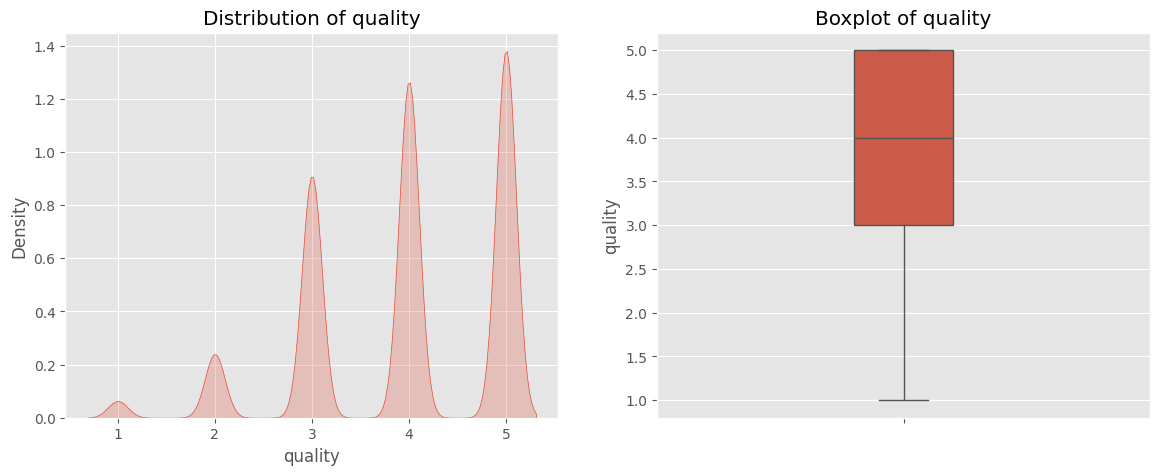

In [31]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.distplot(df['quality'], kde=True, hist=False, kde_kws={'fill':True}, ax=ax[0])
ax[0].set_title('Distribution of quality')
sns.boxplot(df['quality'], width=0.2, ax=ax[1])
ax[1].set_title('Boxplot of quality')
plt.show()

In [32]:
print('Skewness of quality =',df['quality'].skew())
print('Kurtosis of quality =',df['quality'].kurtosis())

Skewness of quality = -0.676932891146504
Kurtosis of quality = -0.16706745556268165


In statistics, skewness and kurtosis are measures that describe the shape of a probability distribution.

A skewness value of 0 indicates a perfectly symmetrical distribution.
A negative skewness indicates a distribution that is skewed to the left (tail on the left).
A positive skewness indicates a distribution that is skewed to the right (tail on the right).
Commonly, a range of -0.5 to 0.5 is considered approximately symmetric.
Kurtosis:

A kurtosis value of 0 indicates that the distribution has tails similar to a normal distribution (mesokurtic).
Negative kurtosis (less than 0) indicates a distribution that is less outlier-prone (light-tailed) than a normal distribution.
Positive kurtosis (greater than 0) indicates a distribution that is more outlier-prone (heavy-tailed) than a normal distribution.
Commonly, a range of -2 to 2 is often considered as acceptable kurtosis. However, there isn't a strict rule, and interpretation may vary.

Skewness and Kurtosis are not so drastic from normal. KDE plot tells that there are multiple modes and Boxplot tells that there are no outliers. We can impute the few missing values with Median which is 4. It is also one of the modes and seems to appear not so many times as well as not so few times. 

In [33]:
df['quality'].fillna(df['quality'].median(), inplace=True)

---

cup_size :

In [34]:
print('Total Missing values are',df['cup_size'].isna().sum())
print('% Nulls in columns is',round(100*df['cup_size'].isna().sum()/len(df),2),'%')

Total Missing values are 6228
% Nulls in columns is 7.56 %


In [35]:
df['cup_size'].value_counts()

cup_size
c         18270
d         16069
b         14571
dd/e      12508
ddd/f      6086
a          4777
dddd/g     2002
h          1037
aa          295
j           197
k           187
i           186
Name: count, dtype: int64

Imputing with mode i.e., cup_size 'c' is not feasible as total missing values (6228) is not so small to ignore compared with value count of 'c'. Reasonable method would be Random Sampling Imputation. We can take the ones occuring more times and randomly impute the missing values using this list.

In [36]:
freq_cup_size = []
for i,j in enumerate(df['cup_size'].value_counts()):
    if j > 10000:
            freq_cup_size.append(df['cup_size'].value_counts().index[i])
#print(freq_cup_size)

In [37]:
np.random.seed(1)
for i in range(len(df)):
    if pd.isna(df['cup_size'][i]):
        df['cup_size'][i] = np.random.choice(freq_cup_size,1)[0]
 

In [38]:
df['cup_size'].value_counts()

cup_size
c         19786
d         17617
b         16167
dd/e      14076
ddd/f      6086
a          4777
dddd/g     2002
h          1037
aa          295
j           197
k           187
i           186
Name: count, dtype: int64

In [39]:
df['cup_size'].isna().sum()

0

---

hips : 

In [40]:
print('Total Missing values are',df['hips'].isna().sum())
print('% Nulls in columns is',round(100*df['hips'].isna().sum()/len(df),2),'%')

Total Missing values are 26609
% Nulls in columns is 32.29 %


In [41]:
df['hips'].describe()

count    55804.000000
mean        40.358559
std          5.827906
min         30.000000
25%         36.000000
50%         39.000000
75%         43.000000
max         60.000000
Name: hips, dtype: float64

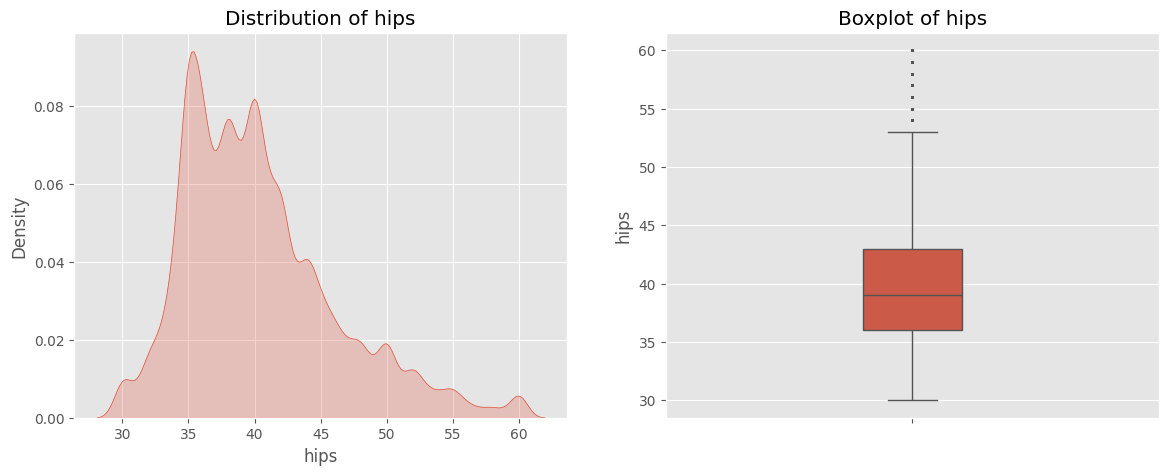

In [42]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.distplot(df['hips'], kde=True, hist=False, kde_kws={'fill':True}, ax=ax[0])
ax[0].set_title('Distribution of hips')
sns.boxplot(df['hips'], width=0.2, fliersize=1, ax=ax[1])
ax[1].set_title('Boxplot of hips')
plt.show()

In [43]:
print('Skewness of hips =',df['hips'].skew())
print('Kurtosis of hips =',df['hips'].kurtosis())

Skewness of hips = 0.9694261785487185
Kurtosis of hips = 0.8494101314680687


'hips' column has nearly 1/3rd values missing, and looking into skewness, kurtosis and KDE plot the distribution is not too drastically away from Normal. Imputing with Mean or Median is reasonable considering both are nearly same as well. But since there are some outliers (from boxplot) we will impute with median as it is less susceptible to outliers.

In [44]:
df['hips'].fillna(df['hips'].median(), inplace=True)

---

bra_size :

In [45]:
print('Total Missing values are',df['bra_size'].isna().sum())
print('% Nulls in columns is',round(100*df['bra_size'].isna().sum()/len(df),2),'%')

Total Missing values are 5992
% Nulls in columns is 7.27 %


In [46]:
df['bra_size'].describe()

count    76421.000000
mean        35.971605
std          3.224445
min         28.000000
25%         34.000000
50%         36.000000
75%         38.000000
max         48.000000
Name: bra_size, dtype: float64

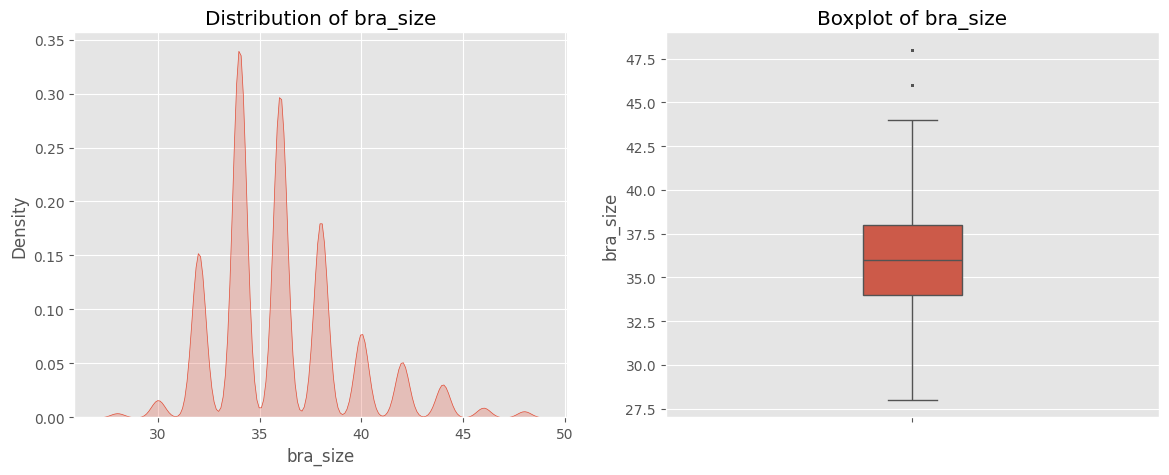

In [47]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.distplot(df['bra_size'], kde=True, hist=False, kde_kws={'fill':True}, ax=ax[0])
ax[0].set_title('Distribution of bra_size')
sns.boxplot(df['bra_size'], width=0.2, fliersize=1, ax=ax[1])
ax[1].set_title('Boxplot of bra_size')
plt.show()

In [48]:
print('Skewness of bra_size =',df['bra_size'].skew())
print('Kurtosis of bra_size =',df['bra_size'].kurtosis())

Skewness of bra_size = 0.900483769429435
Kurtosis of bra_size = 1.0403376632108166


Skewness and Kurtosis of this column describe that the distribution is positively skewed and wide. It can be infered from KDE plot as well. Distribution has multiple modes and outliers. But since only 7% of data is missing, we can comfortably impute the missing values with median.

In [49]:
df['bra_size'].fillna(df['bra_size'].median(), inplace=True)

---

category :

In [50]:
df['category'].isna().sum()

0

In [51]:
df['category'].value_counts()

category
new          21395
tops         20271
dresses      18535
bottoms      15211
outerwear     4205
sale          2521
wedding        275
Name: count, dtype: int64

No Missing values in this column. Also data is intact.

---

bust : 

In [52]:
print('Total Missing values are',df['bust'].isna().sum())
print('% Nulls in columns is',round(100*df['bust'].isna().sum()/len(df),2),'%')

Total Missing values are 70617
% Nulls in columns is 85.69 %


Let's drop this column entirely as there are high number of missing values and analysis on this feature would not yield meaningful insights.

In [53]:
df.drop('bust', axis=1, inplace=True)

---

Height : 

In [54]:
print('Total Missing values are',df['Height'].isna().sum())
print('% Nulls in columns is',round(100*df['Height'].isna().sum()/len(df),2),'%')

Total Missing values are 1105
% Nulls in columns is 1.34 %


In [55]:
df['Height'].describe()

count    81308.000000
mean         5.379457
std          0.260896
min          3.000000
25%          5.250000
50%          5.420000
75%          5.580000
max          7.580000
Name: Height, dtype: float64

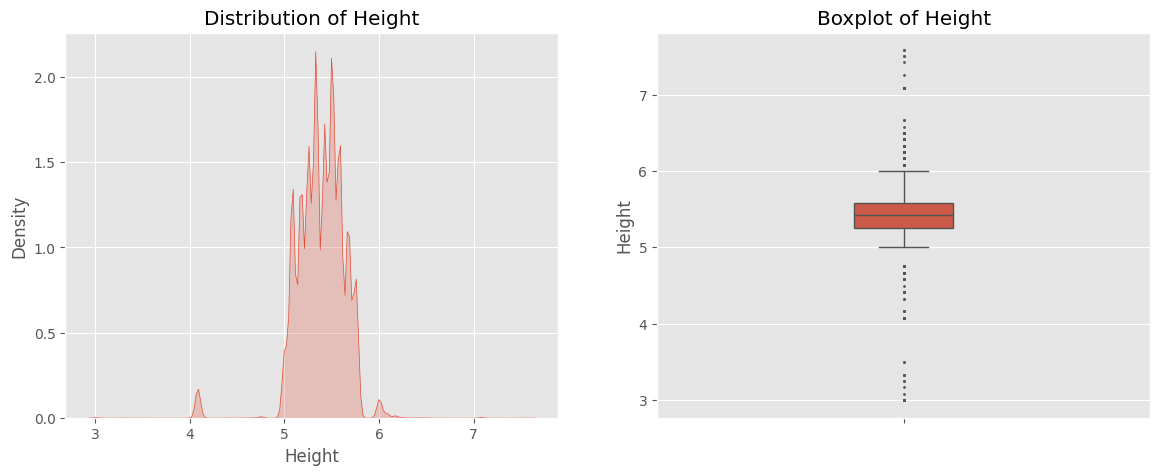

In [56]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.distplot(df['Height'], hist=False, kde=True, kde_kws={'fill':True}, ax=ax[0])
ax[0].set_title('Distribution of Height')
sns.boxplot(df['Height'], width=0.2, fliersize=1, ax=ax[1])
ax[1].set_title('Boxplot of Height')
plt.show()

In [57]:
print('Skewness of Height =',df['Height'].skew())
print('Kurtosis of Height =',df['Height'].kurtosis())

Skewness of Height = -1.3489487434352883
Kurtosis of Height = 8.289719686866366


Negative Skewness denotes left tailed i.e., significant number of data points below the box. Kurtosis is very high denoting long tailed-ness of distribution. Also there are huge number of outliers. Height in general sense is like this, most of the heights would be in between 5ft to 6ft. Very few of them would be above or below this range. Since only 1.34% of data is missing in this column, and also median and mean are close, imputing them with median would be reasonable.

In [58]:
df['Height'].fillna(df['Height'].median(), inplace=True)

---

user_name :

In [59]:
df['user_name'].isna().sum()

0

All usernames for each record are present.

---

length :

In [60]:
df['length'].isna().sum()

35

In [61]:
df['length'].value_counts()

length
just right        61660
slightly long     11220
slightly short     6280
very long          2417
very short          801
Name: count, dtype: int64

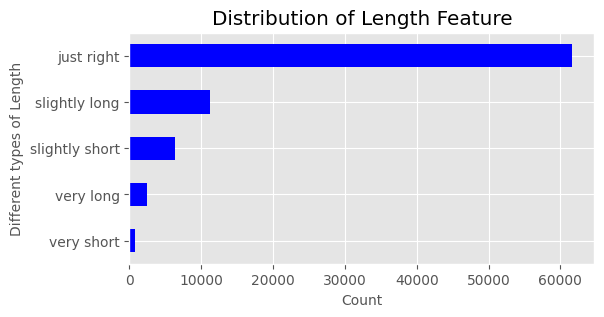

In [62]:
df['length'].value_counts().sort_values().plot(kind='barh', title='Distribution of Length Feature', colormap='winter', figsize=(6,3))
plt.xlabel('Count', fontsize=10)
plt.ylabel('Different types of Length', fontsize=10)
plt.show()

In [63]:
print('% "just right" in length column is',100*len(df[df['length'] == 'just right'])/len(df))

% "just right" in length column is 74.81829323043695


3/4th of data in column is 'just right'. It would be reasonable to impute missing values with this.

In [64]:
df['length'].fillna('just right', inplace=True)

---

fit :

In [65]:
df['fit'].isna().sum()

0

In [66]:
df['fit'].value_counts()

fit
fit      56516
large    12996
small    12901
Name: count, dtype: int64

No Nulls in this.

---

user_id :

In [67]:
df['user_id'].isna().sum()

0

No Nulls in this

---

shoe_size :

In [68]:
print('Total Missing values are',df['shoe_size'].isna().sum())
print('% Nulls in columns is',round(100*df['shoe_size'].isna().sum()/len(df),2),'%')

Total Missing values are 54623
% Nulls in columns is 66.28 %


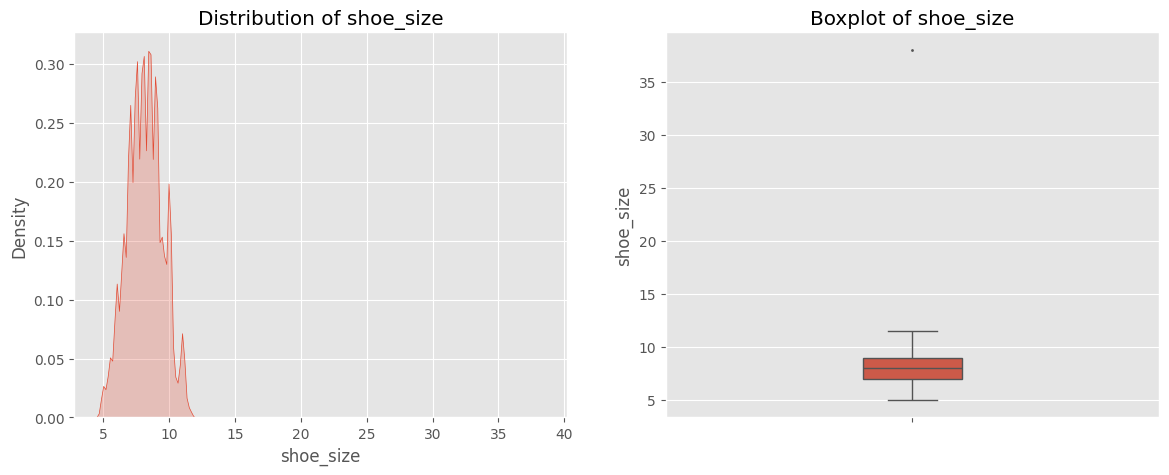

In [69]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.distplot(df['shoe_size'], kde=True, hist=False, kde_kws={'fill':True}, ax=ax[0])
ax[0].set_title('Distribution of shoe_size')
sns.boxplot(df['shoe_size'], width=0.2, fliersize=1, ax=ax[1])
ax[1].set_title('Boxplot of shoe_size')
plt.show()

There seems to be one outlier very far away from rest. Dropping that record entirely.

In [70]:
df[df['shoe_size'] > 35]

,item_id,size,quality,cup_size,hips,bra_size,category,Height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37107,416942,12,5.0,d,46.0,36.0,new,5.42,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [71]:
df.drop(37107, axis=0, inplace=True)

In [72]:
df.reset_index(drop=True, inplace=True)

Plotting the Visualizations again.

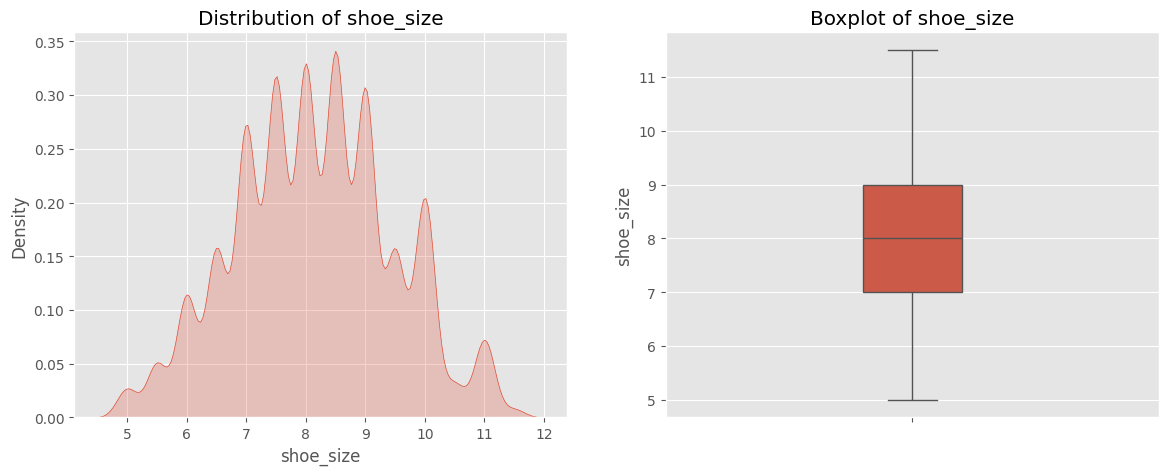

In [73]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
sns.distplot(df['shoe_size'], kde=True, hist=False, kde_kws={'fill':True}, ax=ax[0])
ax[0].set_title('Distribution of shoe_size')
sns.boxplot(df['shoe_size'], width=0.2, fliersize=1, ax=ax[1])
ax[1].set_title('Boxplot of shoe_size')
plt.show()

In [74]:
print('Skewness of shoe_size =',df['shoe_size'].skew())
print('Kurtosis of shoe_size =',df['shoe_size'].kurtosis())

Skewness of shoe_size = 0.04077345880409477
Kurtosis of shoe_size = -0.3896973325027022


In [75]:
df['shoe_size'].value_counts()

shoe_size
8.5     3962
8.0     3820
7.5     3691
9.0     3582
7.0     3177
10.0    2409
6.5     1821
9.5     1795
6.0     1331
11.0     856
5.5      587
10.5     354
5.0      314
11.5      90
Name: count, dtype: int64

Very low skewness and slightly low tailed-ness from Normal. We can observe multiple peaks in KDE. Data is infact discrete as seen above.

Commonly, shoe sizes range between 6 to 10 on average. We can see that majority of datapoints do fall into this range. About 2/3rd of data is missing but this column is very important in further analysis. Hence we thought of Random Sampling Imputation as reasonable method to impute. We have taken the shoe sizes which occur more than 1400 times in dataset i.e., shoe size of 6.5 and above. Then we have randomly imputed the null values using this list of shoe sizes. 

In [76]:
freq_shoe_size = []
for i,j in enumerate(df['shoe_size'].value_counts()):
    if j > 1400:
        freq_shoe_size.append(df['shoe_size'].value_counts().index[i])
#print(freq_shoe_size)

In [77]:
np.random.seed(2)
for i in range(len(df)):
    if pd.isna(df['shoe_size'][i]):
        df['shoe_size'][i] = np.random.choice(freq_shoe_size,1)[0]

In [78]:
df['shoe_size'].value_counts()

shoe_size
8.5     10851
8.0     10559
7.5     10453
9.0     10452
7.0     10121
10.0     9343
6.5      8602
9.5      8499
6.0      1331
11.0      856
5.5       587
10.5      354
5.0       314
11.5       90
Name: count, dtype: int64

In [79]:
df['shoe_size'].isna().sum()

0

---

shoe_width :

In [80]:
print('Total Missing values are',df['shoe_width'].isna().sum())
print('% Nulls in columns is',round(100*df['shoe_width'].isna().sum()/len(df),2),'%')

Total Missing values are 63892
% Nulls in columns is 77.53 %


In [81]:
df['shoe_width'].value_counts()

shoe_width
average    13029
wide        3944
narrow      1547
Name: count, dtype: int64

There are huge number of missing values. Around 3/4th of data. Although 'average' is majority shoe_width of non-null data points it won't be reasonable to impute the remaining 63,892 records with Mode. This is because there are only 3 varieties and 'wide' shoe_width is also in significant number. If we impute all missing with 'average' then it might hinder the insights concerning the other 2 shoe_widths, they become minority. So, we didn't impute the missing values of this column. If this column is used down the line we would just be making analysis only on the non-null records and generalize the findings to entire population. 

---

review_summary :

In [82]:
df['review_summary'].isna().sum()

6709

We can't fix the missing values in it as some customers might not have provided a review after buying. Keeping it as it is.

---

review_text :

In [83]:
df['review_text'].isna().sum()

6709

---

Same as above. Can't fix it.

Final Data Info is as follows

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82412 entries, 0 to 82411
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82412 non-null  int64  
 1   size            82412 non-null  int64  
 2   quality         82412 non-null  float64
 3   cup_size        82412 non-null  object 
 4   hips            82412 non-null  float64
 5   bra_size        82412 non-null  float64
 6   category        82412 non-null  object 
 7   Height          82412 non-null  float64
 8   user_name       82412 non-null  object 
 9   length          82412 non-null  object 
 10  fit             82412 non-null  object 
 11  user_id         82412 non-null  int64  
 12  shoe_size       82412 non-null  float64
 13  shoe_width      18520 non-null  object 
 14  review_summary  75703 non-null  object 
 15  review_text     75703 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 10.1+ MB


##### Converting the cleaned data to Excel.

In [85]:
df.to_excel('Mod_Clothing Cleaned.xlsx', index=False)